In [1]:
import numpy as np
import pandas as pd
import warnings
import urllib.request
from bs4 import BeautifulSoup
warnings.filterwarnings("ignore")
import re
import random
import scipy as sp
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

START_TOKEN = '<START>'
END_TOKEN = '<END>'
NUM_SAMPLES = 150

np.random.seed(0)
random.seed(0)

In [2]:
url = "https://literat.ug.edu.pl/lalka/0001.htm"

html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

# break into lines and remove leading and trailing space on each
lines = (line.strip() for line in text.splitlines())
# break multi-headlines into a line each
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# drop blank lines
text = '\n'.join(chunk for chunk in chunks if chunk)

print(text)

Bolesław Prus: Lalka
ROZDZIAŁ PIERWSZY
JAK WYGLĄDA FIRMA J. MINCEL I S. WOKULSKI PRZEZ SZKŁO BUTELEK?
W początkach roku 1878, kiedy świat polityczny zajmował się pokojem
san-stefańskim, wyborem nowego papieża albo szansami europejskiej wojny, warszawscy
kupcy tudzież inteligencja pewnej okolicy Krakowskiego Przedmieścia niemniej gorąco
interesowała się przyszłością galanteryjnego sklepu pod firmą J. Mincel i S.
Wokulski.
W renomowanej jadłodajni, gdzie na wieczorną przekąskę zbierali się właściciele
składów bielizny i składów win, fabrykanci powozów i kapeluszy, poważni ojcowie
rodzin utrzymujący się z własnych funduszów i posiadacze kamienic bez zajęcia,
równie dużo mówiono o uzbrojeniach Anglii, jak o firmie J. Mincel i S. Wokulski.
Zatopieni w kłębach dymu cygar i pochyleni nad butelkami z ciemnego szkła, obywatele
tej dzielnicy jedni zakładali się o wygranę lub przegranę Anglii, drudzy o bankructwo
Wokulskiego; jedni nazywali geniuszem Bismarcka, drudzy - awanturnikiem Wokulskiego;

In [3]:
text_wo = re.sub(r'[^\w\s]',' ', text)
words = text_wo.split() 
print(len(words), len(set(words)))

1229 762


In [4]:
def split_text_into_sentences(text):
    """
    Split the text into sentences using newline characters and punctuation marks,
    while preserving initials like 'J. Mincel' or 'S. Wokulski' as part of the same sentence.
    """
    text = text.replace('\n', ' ')
    text = text.replace('...', '.')

    sentences = re.split(r'(?<!\b[A-Z])(?<![A-Z]\.)(?<!\b[A-Z]\.)(?<=\.|\?|\!)\s', text)
    sentences = [sentence.lower() for sentence in sentences]

    return sentences

def format_sentences_to_words(sentences):
    """Add <START> and <END> tags to each sentence and split into words."""
    new_sentences = []
    for sentence in sentences:
        formatted_words = []
        words = sentence.strip().split(' ')
        if words:  # Ensure no empty sentences
            formatted_words.append('<START>')
            formatted_words.extend(words)
            formatted_words.append('<END>')
        new_sentences.append(formatted_words)
    return new_sentences

def text_to_list_of_lists(text):
    """Convert the text into a list of lists with each sentence enclosed in <START> and <END>."""
    sentences = split_text_into_sentences(text)
    formatted_sentences = format_sentences_to_words(sentences)
    return formatted_sentences

corpus = text_to_list_of_lists(text)
corpus

[['<START>',
  'bolesław',
  'prus:',
  'lalka',
  'rozdział',
  'pierwszy',
  'jak',
  'wygląda',
  'firma',
  'j.',
  'mincel',
  'i',
  's.',
  'wokulski',
  'przez',
  'szkło',
  'butelek?',
  '<END>'],
 ['<START>',
  'w',
  'początkach',
  'roku',
  '1878,',
  'kiedy',
  'świat',
  'polityczny',
  'zajmował',
  'się',
  'pokojem',
  'san-stefańskim,',
  'wyborem',
  'nowego',
  'papieża',
  'albo',
  'szansami',
  'europejskiej',
  'wojny,',
  'warszawscy',
  'kupcy',
  'tudzież',
  'inteligencja',
  'pewnej',
  'okolicy',
  'krakowskiego',
  'przedmieścia',
  'niemniej',
  'gorąco',
  'interesowała',
  'się',
  'przyszłością',
  'galanteryjnego',
  'sklepu',
  'pod',
  'firmą',
  'j.',
  'mincel',
  'i',
  's.',
  'wokulski.',
  '<END>'],
 ['<START>',
  'w',
  'renomowanej',
  'jadłodajni,',
  'gdzie',
  'na',
  'wieczorną',
  'przekąskę',
  'zbierali',
  'się',
  'właściciele',
  'składów',
  'bielizny',
  'i',
  'składów',
  'win,',
  'fabrykanci',
  'powozów',
  'i',
  'kapelu

In [5]:
corpus_words = list(set(words))
#corpus_words
test_corpus = ["{} All that glitters isn't gold {}".format(START_TOKEN, END_TOKEN).split(" "), "{} All's well that ends well {}".format(START_TOKEN, END_TOKEN).split(" ")]
print(test_corpus)
test_corpus = [item for sublist in test_corpus for item in sublist]
test_corpus = list(set(test_corpus))


[['<START>', 'All', 'that', 'glitters', "isn't", 'gold', '<END>'], ['<START>', "All's", 'well', 'that', 'ends', 'well', '<END>']]


In [6]:
def distinct_words(corpus):
    """ Determine a list of distinct words for the corpus.
        Params:
            corpus (list of list of strings): corpus of documents
        Return:
            corpus_words (list of strings): sorted list of distinct words across the corpus
            n_corpus_words (integer): number of distinct words across the corpus
    """
    corpus_words = []
    n_corpus_words = -1
    
    # ------------------
    # Write your implementation here.
    corpus_words = [item for sublist in corpus for item in sublist]
    corpus_words = sorted(set(corpus_words))
    n_corpus_words = len(list(set(corpus_words)))
    
    # ------------------

    return corpus_words, n_corpus_words

In [7]:
corpus_words, n_corpus_words = distinct_words(corpus)
corpus_words, n_corpus_words

(['"panem',
  '-',
  '.nawet',
  '1860.',
  '1870',
  '1878,',
  '<END>',
  '<START>',
  'a',
  'ajent',
  'ajent.',
  'ajenta',
  'akademią',
  'akurat',
  'albo',
  'ale',
  'ale.',
  'anglii,',
  'ani',
  'aniżeli',
  'awanturniczym',
  'awanturnik!.',
  'awanturnikiem',
  'aż',
  'baba',
  'babą',
  'babą!',
  'babę',
  'bankructwie,',
  'bankructwo',
  'bestia,',
  'bez',
  'bielizny',
  'bismarcka,',
  'blondyn,',
  'bo',
  'bogacą',
  'bogatszą',
  'bolesław',
  'boskiej,',
  'bowiem',
  'branży',
  'brodzie',
  'brodą',
  'bufecie',
  'buteleczka,',
  'butelek?',
  'butelka?',
  'butelkami',
  'butelkę',
  'byt',
  'bywał',
  'być',
  'być,',
  'był',
  'był,',
  'była',
  'było',
  'były',
  'będzie',
  'całą',
  'charakterze,',
  'chce',
  'chciał',
  'chemiczne.',
  'chleba',
  'chwiać',
  'chwili',
  'chłopców',
  'ciekawość',
  'ciemnego',
  'cierpiał',
  'ciągnął',
  'co',
  'co.',
  'coraz',
  'cygar',
  'cygarkiem.',
  'cygaro',
  'czas',
  'czegoś',
  'czołem,',
  'czt

In [8]:
# Define toy corpus
test_corpus = ["{} All that glitters isn't gold {}".format(START_TOKEN, END_TOKEN).split(" "), "{} All's well that ends well {}".format(START_TOKEN, END_TOKEN).split(" ")]
test_corpus_words, num_corpus_words = distinct_words(test_corpus)

# Correct answers
ans_test_corpus_words = sorted([START_TOKEN, "All", "ends", "that", "gold", "All's", "glitters", "isn't", "well", END_TOKEN])
ans_num_corpus_words = len(ans_test_corpus_words)

# Test correct number of words
assert(num_corpus_words == ans_num_corpus_words), "Incorrect number of distinct words. Correct: {}. Yours: {}".format(ans_num_corpus_words, num_corpus_words)

# Test correct words
assert (test_corpus_words == ans_test_corpus_words), "Incorrect corpus_words.\nCorrect: {}\nYours:   {}".format(str(ans_test_corpus_words), str(test_corpus_words))

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


In [9]:
list_of_lists = ['{} {} {}'.format(START_TOKEN, line, END_TOKEN).split() for line in text_wo.splitlines()]
#list_of_lists

In [10]:
#distinct_words(list_of_lists)

In [11]:
def compute_co_occurrence_matrix(list_of_lists, window=4):
    """ Compute co-occurrence matrix for the given corpus and window_size (default of 4).
    
        Note: Each word in a document should be at the center of a window. Words near edges will have a smaller
              number of co-occurring words.
              
              For example, if we take the document "<START> All that glitters is not gold <END>" with window size of 4,
              "All" will co-occur with "<START>", "that", "glitters", "is", and "not".
    
        Params:
            list_of_lists (list of list of strings): corpus of documents
            window (int): size of context window
        Return:
            M (a symmetric numpy matrix of shape (number of unique words in the corpus , number of unique words in the corpus)): 
                Co-occurence matrix of word counts. 
                The ordering of the words in the rows/columns should be the same as the ordering of the words given by the distinct_words function.
            word2ind (dict): dictionary that maps word to index (i.e. row/column number) for matrix M.
    """
    words, n_words = distinct_words(list_of_lists)
    M = None
    word2ind = {}
    
    # ------------------
    # Write your implementation here.
    M = np.zeros([distinct_words(list_of_lists)[1], distinct_words(list_of_lists)[1]])
    for s in range(0, distinct_words(list_of_lists)[1]):
        window = 1
        symbol = sorted(distinct_words(list_of_lists)[0])[s]
        #print("The word is: ", symbol)
        cooccurrence_list = []
        M_list = []
        for sublist in list_of_lists:
            if any(e == symbol for e in sublist):
                #print(sublist)
                #print(sublist.index(symbol))
                for i in range(1, window+1):
                    if sublist.index(symbol) - i >= 0:
                        #print(np.array(sublist)[sublist.index(symbol) - i], sublist.index(symbol) - i, i)
                        cooccurrence_list.append(np.array(sublist)[sublist.index(symbol) - i])
                        M_list.append(sorted(distinct_words(list_of_lists)[0]).index(np.array(sublist)[sublist.index(symbol) - i]))
                    if sublist.index(symbol) + i <= len(sublist)-1:
                        #print(np.array(sublist)[sublist.index(symbol) + i], sublist.index(symbol) + i, i)
                        cooccurrence_list.append(np.array(sublist)[sublist.index(symbol) + i])
                        M_list.append(sorted(distinct_words(list_of_lists)[0]).index(np.array(sublist)[sublist.index(symbol) + i]))
        #print(cooccurrence_list, sorted(M_list))
        for element in sorted(M_list):
            #if element > s:
            M[s][element] = M[s][element] + 1

    word2ind = dict(zip(words, range(len(words))))
    
    # ------------------

    return M, word2ind

list_of_lists = ["{} All that glitters isn't gold {}".format(START_TOKEN, END_TOKEN).split(" "), "{} All's well that ends well {}".format(START_TOKEN, END_TOKEN).split(" ")]
M, word2ind = compute_co_occurrence_matrix(list_of_lists)
word2ind

{'<END>': 0,
 '<START>': 1,
 'All': 2,
 "All's": 3,
 'ends': 4,
 'glitters': 5,
 'gold': 6,
 "isn't": 7,
 'that': 8,
 'well': 9}

In [12]:
M_polish, word2ind_polish = compute_co_occurrence_matrix(corpus)
M_polish 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
list_of_lists = ["{} All that glitters isn't gold {}".format(START_TOKEN, END_TOKEN).split(" "), "{} All's well that ends well {}".format(START_TOKEN, END_TOKEN).split(" ")]
M = np.zeros([distinct_words(list_of_lists)[1], distinct_words(list_of_lists)[1]])
for s in range(0, distinct_words(list_of_lists)[1]):
    window = 1
    symbol = sorted(distinct_words(list_of_lists)[0])[s]
    print("The word is: ", symbol)
    cooccurrence_list = []
    M_list = []
    for sublist in list_of_lists:
        if any(e == symbol for e in sublist):
            print(sublist)
            print(sublist.index(symbol))
            for i in range(1, window+1):
                if sublist.index(symbol) - i >= 0:
                    print(np.array(sublist)[sublist.index(symbol) - i], sublist.index(symbol) - i, i)
                    cooccurrence_list.append(np.array(sublist)[sublist.index(symbol) - i])
                    M_list.append(sorted(distinct_words(list_of_lists)[0]).index(np.array(sublist)[sublist.index(symbol) - i]))
                if sublist.index(symbol) + i <= len(sublist)-1:
                    print(np.array(sublist)[sublist.index(symbol) + i], sublist.index(symbol) + i, i)
                    cooccurrence_list.append(np.array(sublist)[sublist.index(symbol) + i])
                    M_list.append(sorted(distinct_words(list_of_lists)[0]).index(np.array(sublist)[sublist.index(symbol) + i]))
    print(cooccurrence_list, sorted(M_list))
    for element in sorted(M_list):
        #if element > s:
        M[s][element] = M[s][element] + 1
#M = M / 2
print(sorted([START_TOKEN, "All", "ends", "that", "gold", "All's", "glitters", "isn't", "well", END_TOKEN]))
print(sorted(distinct_words(list_of_lists)[0]))
print(M)

The word is:  <END>
['<START>', 'All', 'that', 'glitters', "isn't", 'gold', '<END>']
6
gold 5 1
['<START>', "All's", 'well', 'that', 'ends', 'well', '<END>']
6
well 5 1
['gold', 'well'] [6, 9]
The word is:  <START>
['<START>', 'All', 'that', 'glitters', "isn't", 'gold', '<END>']
0
All 1 1
['<START>', "All's", 'well', 'that', 'ends', 'well', '<END>']
0
All's 1 1
['All', "All's"] [2, 3]
The word is:  All
['<START>', 'All', 'that', 'glitters', "isn't", 'gold', '<END>']
1
<START> 0 1
that 2 1
['<START>', 'that'] [1, 8]
The word is:  All's
['<START>', "All's", 'well', 'that', 'ends', 'well', '<END>']
1
<START> 0 1
well 2 1
['<START>', 'well'] [1, 9]
The word is:  ends
['<START>', "All's", 'well', 'that', 'ends', 'well', '<END>']
4
that 3 1
well 5 1
['that', 'well'] [8, 9]
The word is:  glitters
['<START>', 'All', 'that', 'glitters', "isn't", 'gold', '<END>']
3
that 2 1
isn't 4 1
['that', "isn't"] [7, 8]
The word is:  gold
['<START>', 'All', 'that', 'glitters', "isn't", 'gold', '<END>']
5
is

In [14]:
#np.array(sorted(distinct_words(list_of_lists)[0]))[sorted(distinct_words(list_of_lists)[0])].index(element)
sorted(cooccurrence_list)

["All's", 'that']

In [15]:
window = 4
symbol = distinct_words(list_of_lists)[0][2]
print("The word is: ", symbol)
cooccurrence_list = []
M_list = []
for sublist in list_of_lists:
    if any(e == symbol for e in sublist):
        print(sublist)
        print(sublist.index(symbol))
        for i in range(1, window+1):
            if sublist.index(symbol) - i >= 0:
                print(np.array(sublist)[sublist.index(symbol) - i], sublist.index(symbol) - i, i)
                cooccurrence_list.append(np.array(sublist)[sublist.index(symbol) - i])
                M_list.append(distinct_words(list_of_lists)[0].index(np.array(sublist)[sublist.index(symbol) - i]))
            if sublist.index(symbol) + i <= len(sublist)-1:
                print(np.array(sublist)[sublist.index(symbol) + i], sublist.index(symbol) + i, i)
                cooccurrence_list.append(np.array(sublist)[sublist.index(symbol) + i])
                M_list.append(distinct_words(list_of_lists)[0].index(np.array(sublist)[sublist.index(symbol) + i]))
print(cooccurrence_list, sorted(M_list))
for element in sorted(M_list):
    if element > s:
        M[s][element] = M[s][element] + 1

The word is:  All
['<START>', 'All', 'that', 'glitters', "isn't", 'gold', '<END>']
1
<START> 0 1
that 2 1
glitters 3 2
isn't 4 3
gold 5 4
['<START>', 'that', 'glitters', "isn't", 'gold'] [1, 5, 6, 7, 8]


In [16]:
#M[0][4]
df = pd.DataFrame(M)
df.to_csv("foo.csv", index=False, header=False)

In [17]:
M_test_ans = np.array( 
    [[0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,],
     [0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,],
     [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,],
     [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,],
     [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,],
     [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,],
     [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,],
     [0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,],
     [0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,]] # changed slightly, as I did not understand how the proposed result is to be achieved
)

ans_test_corpus_words = sorted([START_TOKEN, "All", "ends", "that", "gold", "All's", "glitters", "isn't", "well", END_TOKEN])
word2ind_ans_test = dict(zip(ans_test_corpus_words, range(len(ans_test_corpus_words))))

# Test correct word2ind
assert (word2ind == word2ind_ans_test), "Your word2ind is incorrect:\nCorrect: {}\nYours: {}".format(word2ind, word2ind_ans_test)
# Test correct M shape
assert (M.shape == M_test_ans.shape), "M matrix has incorrect shape.\nCorrect: {}\nYours: {}".format(M_test.shape, M_test_ans.shape)

# Test correct M values
for idx1 in range(M.shape[0]):
    for idx2 in range(M.shape[1]):
        student = M[idx1, idx2]
        correct = M_test_ans[idx1, idx2]
        if student != correct:
            print("Correct M:")
            print(M_test_ans)
            print("Your M: ")
            print(M)
            raise AssertionError("Incorrect count at index ({}, {}). Yours has {} but should have {}.".format(idx1, idx2, student, correct))

# Print Success
print("-" * 80)
print("Passed All Tests!")
print("-" * 80)


--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


In [18]:
def reduce_to_k_dim(M, k=2):
    """ Reduce a co-occurence count matrix of dimensionality (num_corpus_words, num_corpus_words)
        to a matrix of dimensionality (num_corpus_words, k) using the following SVD function from Scikit-Learn:
            - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
    
        Params:
            M (numpy matrix of shape (number of unique words in the corpus , number of unique words in the corpus)): co-occurence matrix of word counts
            k (int): embedding size of each word after dimension reduction
        Return:
            M_reduced (numpy matrix of shape (number of corpus words, k)): matrix of k-dimensioal word embeddings.
                    In terms of the SVD from math class, this actually returns U * S
    """    
    n_iters = 10    # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))
    
    # ------------------
    # Write your implementation here.
    svd = TruncatedSVD(n_components=k, n_iter=n_iters, random_state=42)
    M = svd.fit_transform(M)
    M_reduced = M
    # ------------------

    print("Done.")
    return M_reduced

In [19]:
# Define toy corpus and run student code
test_corpus = ["{} All that glitters isn't gold {}".format(START_TOKEN, END_TOKEN).split(" "), "{} All's well that ends well {}".format(START_TOKEN, END_TOKEN).split(" ")]
M_test, word2ind_test = compute_co_occurrence_matrix(test_corpus)
M_test_reduced = reduce_to_k_dim(M_test, k=2)

# Test proper dimensions
assert (M_test_reduced.shape[0] == 10), "M_reduced has {} rows; should have {}".format(M_test_reduced.shape[0], 10)
assert (M_test_reduced.shape[1] == 2), "M_reduced has {} columns; should have {}".format(M_test_reduced.shape[1], 2)

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

Running Truncated SVD over 10 words...
Done.
--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


Running Truncated SVD over 787 words...
Done.


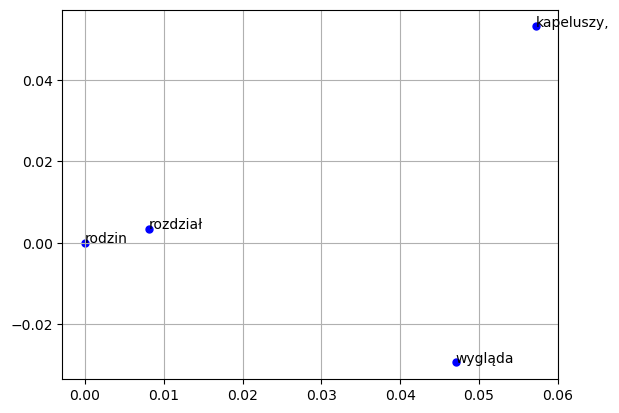

In [20]:
def plot_embeddings(M_reduced, word2ind, words):
    """ Plot in a scatterplot the embeddings of the words specified in the list "words".
        NOTE: do not plot all the words listed in M_reduced / word2ind.
        Include a label next to each point.
        
        Params:
            M_reduced (numpy matrix of shape (number of unique words in the corpus , 2)): matrix of 2-dimensioal word embeddings
            word2ind (dict): dictionary that maps word to indices for matrix M
            words (list of strings): words whose embeddings we want to visualize
    """

    # ------------------
    # Write your implementation here.
    fig, ax = plt.subplots()
    for word in words:
        if word in word2ind:
            index = word2ind[word]
            ax.scatter(M_reduced[index, 0], M_reduced[index, 1], c="blue", s=25)
            ax.annotate(word, (M_reduced[index, 0], M_reduced[index, 1]))
    plt.grid()
    plt.show() 
    # ------------------

plot_embeddings(reduce_to_k_dim(M_polish), word2ind_polish, ['rozdział', 'wygląda', 'kapeluszy,', 'rodzin'])